## Problem 1: Classification on Digital Images Using Traditional Machine Learning (30%)

### (a) Prepare MNIST dataset

HuggingFace Dataset
🤗 Datasets is a library for easily accessing and sharing datasets for Audio, Computer Vision, and Natural Language Processing (NLP) tasks. (https://huggingface.co/docs/datasets/index)

In [ ]:
!pip install datasets pillow numpy

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

ds = load_dataset("ylecun/mnist")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/6.97k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/15.6M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/2.60M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/60000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from PIL import Image
import numpy as np


# Reformat the data to a stack of numpy arrays
def reformat_data(hf_mnist_data):
    train_images = []
    train_labels = []
    val_images = []
    val_labels = []
    for data in hf_mnist_data['train']:
        train_images.append(np.array(data['image']).flatten())
        train_labels.append(data['label'])
    for data in hf_mnist_data['test']:
        val_images.append(np.array(data['image']).flatten())
        val_labels.append(data['label'])
    train_images = np.stack(train_images)
    val_images = np.stack(val_images)
    train_labels = np.array(train_labels)
    val_labels = np.array(val_labels)
    return train_images, train_labels, val_images, val_labels


In [ ]:
traindata, trainlabels, testdata, testlabels = reformat_data(ds)
print(traindata.shape)
print(trainlabels.shape)
print(testdata.shape)
print(testlabels.shape)
print(traindata.min(), traindata.max())
print(testdata.min(), testdata.max())
print(trainlabels.min(), trainlabels.max())
print(testlabels.min(), testlabels.max())

(60000, 784)
(60000,)
(10000, 784)
(10000,)
0 255
0 255
0 9
0 9



Visualize an image with label.

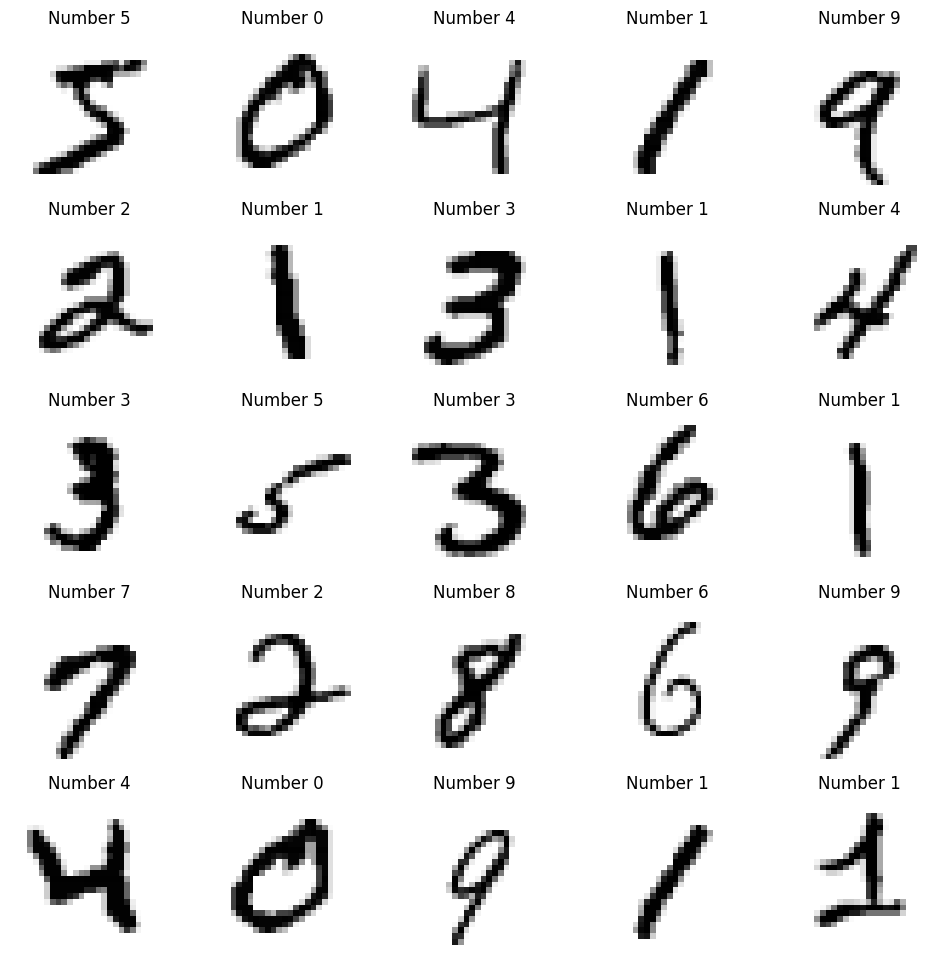

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow(traindata[i].reshape((28, 28)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

### (b) PCA on MNIST

Implement PCA **from scratch** on the whole MNIST dataset.

How to implement the PCA to select a reduced dimension k which keeps 30% information after the reduction?


In [ ]:
import numpy as np
from numpy import linalg as LA
from sklearn.preprocessing import StandardScaler
# TODO: implement PCA

def PCA(training_data, testing_data):


  # standardize training and testing data
  scaler = StandardScaler()
  training_data_std = scaler.fit_transform(training_data)
  testing_data_std = scaler.transform(testing_data)

  # calculate the covariance matrix
  cov_matrix_training_data = np.cov(training_data_std.T)
  # cov_matrix_testing_data = np.cov(testing_data_std.T)

  # calculate eigenvalues and eigenvectors
  eigenvalues, eigenvectors = LA.eig(cov_matrix_training_data)

  # sort them
  sorted_idx = eigenvalues.argsort()[::-1] # in descending order
  sorted_eigenvalues = eigenvalues[sorted_idx]
  sorted_eigenvectors = eigenvectors[:, sorted_idx]

  # pick k eigenvalues
  thershold = 0.3 # select a reduced dimension k which keeps 30% information after the reduction
  explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)
  cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
  # find min. k
  k = np.argmax(cumulative_variance_ratio >= thershold) + 1


  # transform the original matrix
  reduced_training_data = np.dot(training_data_std, sorted_eigenvectors[:, :k])
  reduced_testing_data = np.dot(testing_data_std, sorted_eigenvectors[:, :k])

  print(f"k = {k}")
  # print(f"Cumulative variance explained by selected components: {cumulative_variance_ratio[k-1]:.2f}")

  return reduced_training_data, reduced_testing_data

In [ ]:
reduced_training_data, reduced_test_data = PCA(traindata , testdata)

k = 12


### (c) Logistic Regression
Now, we have reduced our data to k dimension. Please implement a logistic regression model taking k-dimensional data to classify the hand written digits and train it with max_iter=1000. You are allowed to use libraries like scikit-learn. Please refer to https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html



In [ ]:
from sklearn.linear_model import LogisticRegression

# todo

# apply pca
reduced_training_data, reduced_test_data = PCA(traindata , testdata)

# apply logistic regression
log_reg = LogisticRegression(max_iter=1000)
# fit the logistic regression model to the reduced training data
log_reg.fit(reduced_training_data, trainlabels)

# predict
pred_log_reg = log_reg.predict(reduced_test_data)


k = 12


In [ ]:
from sklearn import metrics

# todo: print the accuracy on the given test data and labels.
accuracy = metrics.accuracy_score(testlabels, pred_log_reg)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 82.24%


### (d) Support Vector Machine (SVM) Classifier

Lets build a SVM Classifier for MNIST dataset. Here you also should use the representative data (after PCA) for training and inference. For more details about using SVM, please refer to https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

Implement a SVM classifier using the scikit-learn package: sklearn.svm.SVC with L2 regularization parameters C = 1.0, kernel type ‘linear’.

In [ ]:
from sklearn.svm import SVC
# todo

# apply pca
reduced_training_data, reduced_test_data = PCA(traindata , testdata)

# create SVC with L2 regularization parameters C = 1.0, kernel type ‘linear’
svm_classifier = SVC(C=1.0, kernel='linear', random_state=42)
# train the SVM classifier
svm_classifier.fit(reduced_training_data, trainlabels)

# predict
pred_svm = svm_classifier.predict(reduced_test_data)

k = 12



Evaluate the classification accuracy on the validation set.

In [ ]:
# todo: print the accuracy on the given test data and labels.
accuracy = metrics.accuracy_score(testlabels, pred_svm)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 86.29%



Try using a different kernel type, change the kernal from ‘linear’ to ‘rbf’ (radial basis function) and evaluate the classification accuracy on the validation set. Which one (‘linear’ or ‘rbf’) can give you higher accuracy?



Ans:  
Accuracy with linear kernel type: 86.30%  
Accuracy with rbf kernel type: 93.67%  
Therefore, rbf kernel provides the higher accuracy.

In [ ]:
# todo

# apply pca
reduced_training_data, reduced_test_data = PCA(traindata , testdata)

# create SVC rbf classifier
svm_classifier_rbf = SVC(C=1.0, kernel='rbf', random_state=42)
# train the SVM classifier
svm_classifier_rbf.fit(reduced_training_data, trainlabels)

# predict
pred_svm_rbf = svm_classifier_rbf.predict(reduced_test_data)

# print the accuracy
accuracy = metrics.accuracy_score(testlabels, pred_svm_rbf)
print(f"Accuracy: {accuracy * 100:.2f}%")

k = 12
Accuracy: 93.67%


Fix the kernel type to be ‘rbf’ and try different sets of regularization parameters C ∈ {0. 1, 0. 5, 1. 0, 5. 0, 10. 0}, and report all the classification accuracies on the validation set. What’s the meaning of changing the C here? Which C in your case can give your the best accurarcy?

Compared with the logistic regression, which method performs better? Please briefly explain it.

Ans:  
1. C is the regularization parameter. It controls the trade-off between maximizing the margin and minimizing the classification error. For smaller C, it leads to higher regularization and wider margin, leading to better generalization on unseen data. For larger C, it reduces regularization and fit the training data more closely. Overfitting may occur while using larger C.  
2. C=10 case gives me the best accuracy.  
3. SVM with RBF kernel generally performs better in terms of classification accuracy because it can capture the complex, non-linear relationships between the pixels. On the other hand, logistic regression is a faster way to do the classification task, but the performance is limited to its linear assumption.

In [ ]:
# todo

# apply pca
reduced_training_data, reduced_test_data = PCA(traindata , testdata)

c_list = [0.1, 0.5, 1.0, 5.0, 10.0]
acc = []

for c in c_list:
  # create SVC rbf classifier
  svm_classifier_rbf = SVC(C=c, kernel='rbf', random_state=42)

  # train the SVM classifier
  svm_classifier_rbf.fit(reduced_training_data, trainlabels)

  # predict
  pred_svm_rbf = svm_classifier_rbf.predict(reduced_test_data)

  # accuracy
  accuracy = metrics.accuracy_score(testlabels, pred_svm_rbf)
  acc.append((c, accuracy))
  print(f"Accuracy of SVM classifier (C={c}): {accuracy * 100:.2f}%")


# get best accuracy
best_c, best_accuracy = max(acc, key=lambda item: item[1])
print(f"Best accuracy obtained with C={best_c}: {best_accuracy * 100:.2f}%")

k = 12
Accuracy of SVM classifier (C=0.1): 91.54%
Accuracy of SVM classifier (C=0.5): 93.18%
Accuracy of SVM classifier (C=1.0): 93.67%
Accuracy of SVM classifier (C=5.0): 94.58%
Accuracy of SVM classifier (C=10.0): 94.87%
Best accuracy obtained with C=10.0: 94.87%



Run your classifier on the testing set with the model which achieves the best performance on the validation dataset, and visualize some of the images with their predicted labels.


Test accuracy with best model (C=10.0): 94.87%


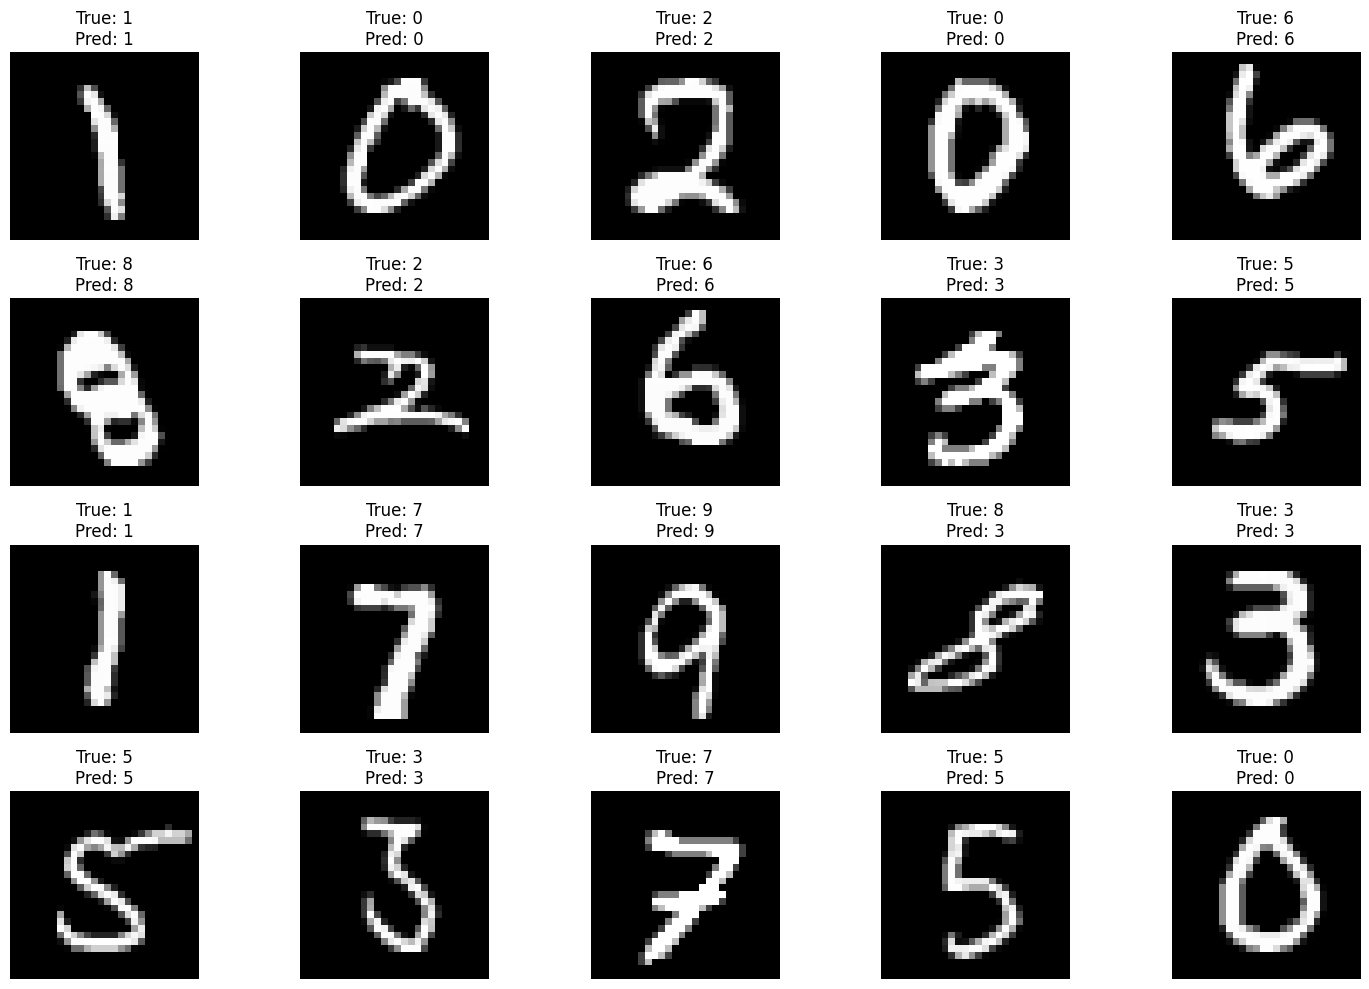

In [ ]:
# todo
import matplotlib.pyplot as plt

# retrain the best classifier
svm_classifier_best = SVC(C=best_c, kernel='rbf', random_state=42)
svm_classifier_best.fit(reduced_training_data, trainlabels)

# predict
pred_svm_best = svm_classifier_rbf.predict(reduced_test_data)

# evaluation
accuracy = metrics.accuracy_score(testlabels, pred_svm_best)
print(f"Test accuracy with best model (C={best_c}): {accuracy * 100:.2f}%")

# visualize the images and labels
def plot_pred(images, true_labels, predicted_labels, num_images=10):
  plt.figure(figsize=(15, 10))

  # print random images
  random_image = np.random.choice(images.shape[0], num_images, replace=False)
  for i, idx in enumerate(random_image):
    plt.subplot(4, 5, i + 1)
    plt.imshow(images[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}")
    plt.axis('off')
  plt.tight_layout()
  plt.show()

# Plot the first 10 test images and their predictions
plot_pred(testdata, testlabels, pred_svm_best, num_images=20)

## Problem 2: Autograd – implement your backpropagation (30%)


Modern deep learning frameworks, such as PyTorch's [Autograd](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html), incorporate automatic differentiation systems essential for training neural networks. Leveraging dynamic computation graphs, these systems record tensor operations executed in the forward pass. During the backward pass, usually initiated on a loss tensor, PyTorch meticulously navigates this graph in reverse to calculate and retain gradients. Autograd not only grant adaptability in crafting models but also optimize memory usage.

In this problem, we are going to implement a simplified engine for auto differentiation or Autograd. We will walk through the process of constructing computational graph , implementing backpropagation, defining nuerons and layers, building a multi-layer perceptron and eventually training our MLP on simple data.
This problem is modified from a well taught online lecture, https://youtu.be/VMj-3S1tku0?si=BfyFXL0WDSoWgERJ, by Andrej Karpathy.

Eventually, we will build a computational graph like the image below. It not only shows the computational results at each node but also shows the gradient.

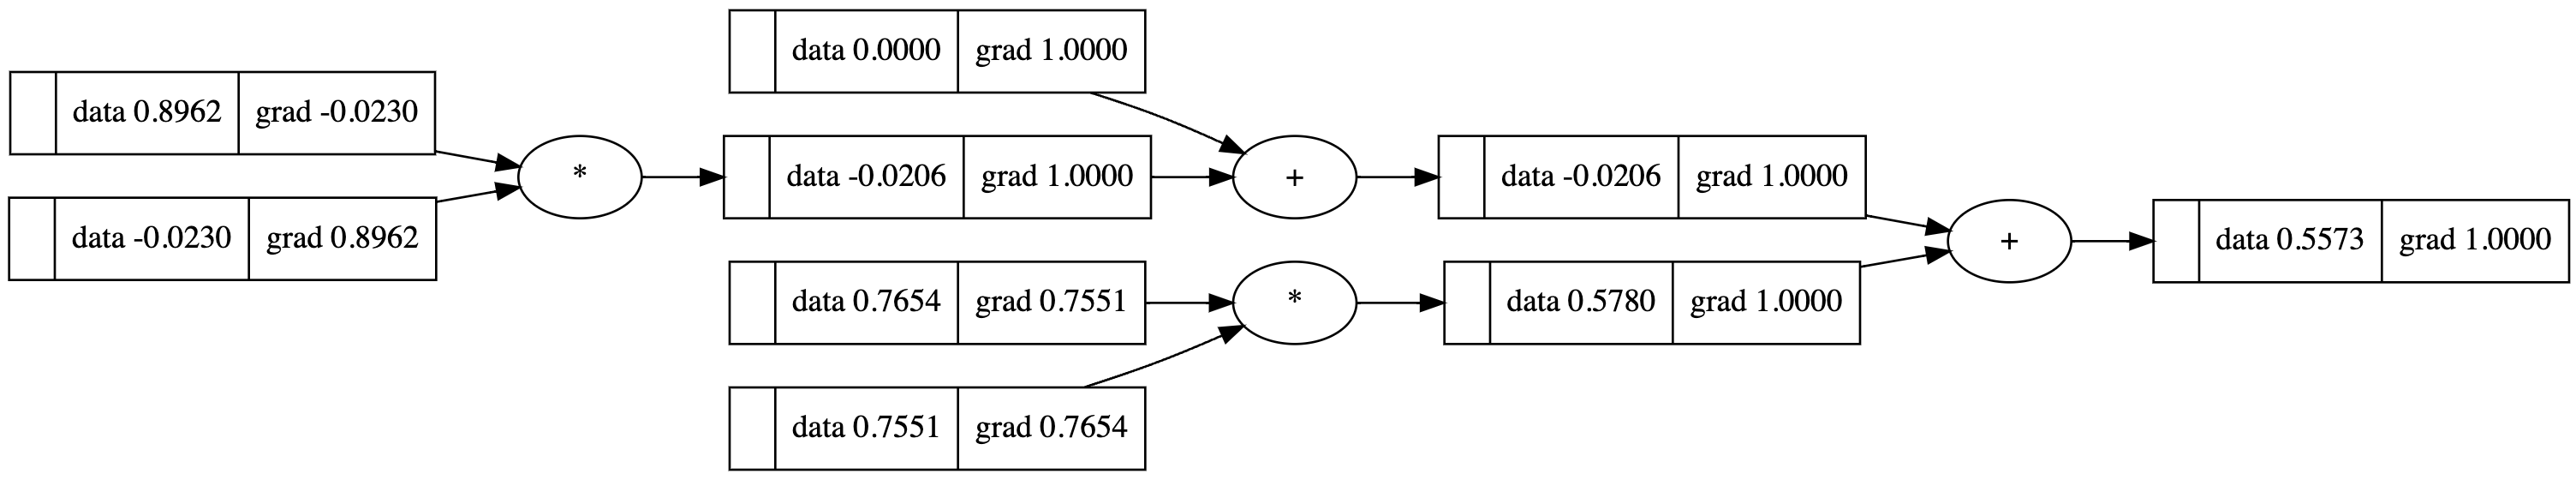

Please install `graphviz` by running the cell below.

In [ ]:
!apt-get install graphviz
!pip install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


### Value
`Value` is the class representing node in computational graphs. It contains the node's value, gradients, some mathematical operations with their differentiation formulas.

Here, we provide the class's abstract structure and you will gradually implement everything.
First, lets define the class, `Value`, and print it out.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data,  _op=''):
        self.data = data
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

In [ ]:
print(Value(568))

Value(data=568, grad=0)


Now, let's first define addition function in `Value`.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _op='', label=''):
        self.data = data
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging

    # This is how we can use + operator to add two Value objects
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # TODO: Implement addition of two values
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __radd__(self, other): # other + self
        return self + other

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

In [ ]:
print(Value(500) + Value(68))
print(Value(500) + 68)
print(500 + Value(68)) # achieved by __radd__

Value(data=568, grad=0)
Value(data=568, grad=0)
Value(data=568, grad=0)


We can visualize the computational graph using the provided utility function.

In [ ]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

But, before we draw the computational graph, we should make connection from the end node being drawn all the way to the begining nodes.

We can do this by memorizing each node's predecessors, or a set of nodes creating the node.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _prev=(),  _op='', label=''):
        self.data = data
        self._prev = set(_prev)
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging

    # This is how we can use + operator to add two Value objects
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # TODO: Reimplement addition of two values to memorize previous nodes
        out = Value(self.data + other.data, (self, other), '+')
        return out

    def __radd__(self, other): # other + self
        return self + other

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

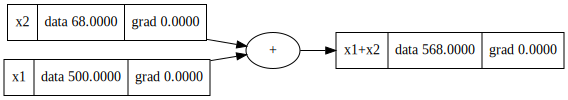

In [ ]:
# inputs x1,x2
x1 = Value(500.0, label='x1')
x2 = Value(68.0, label='x2')
x1x2 =  x1 + x2
x1x2.label = 'x1+x2'
draw_dot(x1x2)

Now, we want to know the gradient of x1+x2 with respect to x1, x2 and itself.

In the above example, we can easily compute the gradients by partial differentiation due to a direct connection between x1 or x2 to x1+x2. We implement this differentiation in the `__add__` function, called `__backward__`.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _prev=(),  _op='', label=''):
        self.data = data
        self._prev = set(_prev)
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging
        self._backward = lambda: None

    # This is how we can use + operator to add two Value objects
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # Paste your previous written code here
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward

        return out

    def __radd__(self, other): # other + self
        return self + other

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

Let's test the backward function.

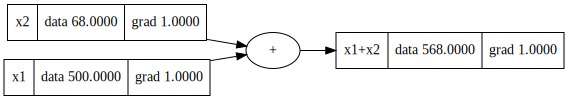

In [ ]:
# inputs x1,x2
x1 = Value(500.0, label='x1')
x2 = Value(68.0, label='x2')
x1x2 =  x1 + x2
x1x2.label = 'x1+x2'
x1x2.grad = 1.0 # set the gradient of the output node to 1 since derivative of x1x2 wrt itself is 1
x1x2._backward() # compute the gradients of x1 and x2
draw_dot(x1x2)

Yay, we successfully construct the graph and do the backward pass of this graph to get the gradients of every node.

Now, let's define more common operations for more generic neural network architectures.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _prev=(),  _op='', label=''):
        self.data = data
        self._prev = set(_prev)
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging
        self._backward = lambda: None

    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # Paste your previous written code here
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __radd__(self, other): # other * self
        return self + other

    def __mul__(self, other):
        # TODO: following __add__() to implement multiplication and its backward function
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        # TODO: following __add__() to implement power and its backward function
        out = Value(self.data ** other, (self,), f'**{other}')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other * (self.data ** (other - 1)) * out.grad # *out.grad to chain the gradient!
        out._backward = _backward
        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

We can now test our autograd on a more complicated computational graph.

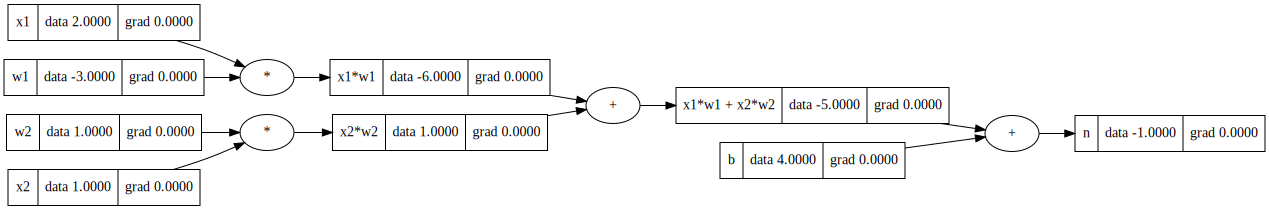

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(1.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(4, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
draw_dot(n)

The next question is how do we get the gradient of `n` with respect to `w1`?
The answer is chain rule. We can get the gradient by traversing from `n` to `w1`. From $\text{node}_{i}$ to $\text{node}_{i+1}$, we multiply the gradient obtained from $\{ \text{node}_{k} \mid 0 \leq k \leq i-1 \}$ with the current gradient function, which is implemented by `__backward__` of each different operation.

Naively, we can manually traverse the nodes like the following.


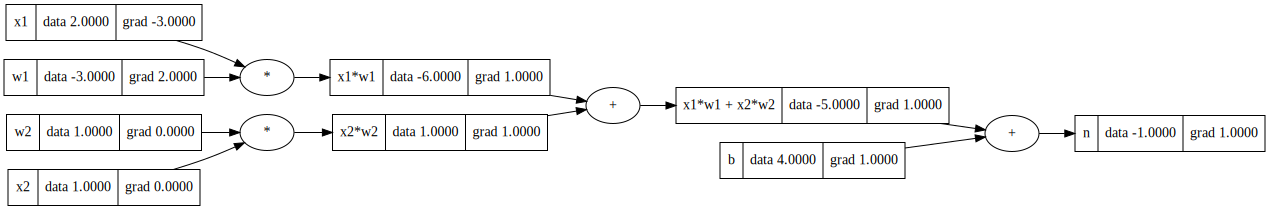

In [ ]:
n.grad = 1.0
n._backward()
x1w1x2w2._backward()
x1w1._backward()
draw_dot(n)

Looks great! But we need a more efficient way to get the gradient of every node.

One way to do this is using the topological sort (https://en.wikipedia.org/wiki/Topological_sorting).

In [ ]:
# A DFS based implementation of topological sort
def topo_sort(root):
  topo = []
  visited = set()
  def build_topo(v):
    if v not in visited:
      visited.add(v)
      for child in v._prev:
        build_topo(child)
      topo.append(v)
  build_topo(root)
  return topo # return topological order all of the children in the graph

Let's see the topological sort in action.

In [ ]:
topology = topo_sort(n)
print([v.label for v in topology])

['b', 'w2', 'x2', 'x2*w2', 'x1', 'w1', 'x1*w1', 'x1*w1 + x2*w2', 'n']


We can observe that the 'n' is the last element of the list, and the order of the list is indeed in a depth-first searching order.

Now, add the topo_sort into Value to calculate gradients easily from any node.

In [ ]:
class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _prev=(),  _op='', label=''):
        self.data = data
        self._prev = set(_prev)
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging
        self._backward = lambda: None

    # TODO: Paste your previously implemented functions here
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # Paste your previous written code here
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __radd__(self, other): # other * self
        return self + other

    def __mul__(self, other):
        # TODO: following __add__() to implement multiplication and its backward function
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        # TODO: following __add__() to implement power and its backward function
        out = Value(self.data ** other, (self,), f'**{other}')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other * (self.data ** (other - 1)) * out.grad # *out.grad to chain the gradient!
        out._backward = _backward
        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def backward(self):
      # TODO: Use the provided function 'topo_sort' to perform the backward pass from the self node all the way to the beginning of the graph
        topo = []
        visited = set()
        def build_topo(v):
          if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for n in reversed(topo):
          n._backward()

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

Let's do the backpropagation again using backward.

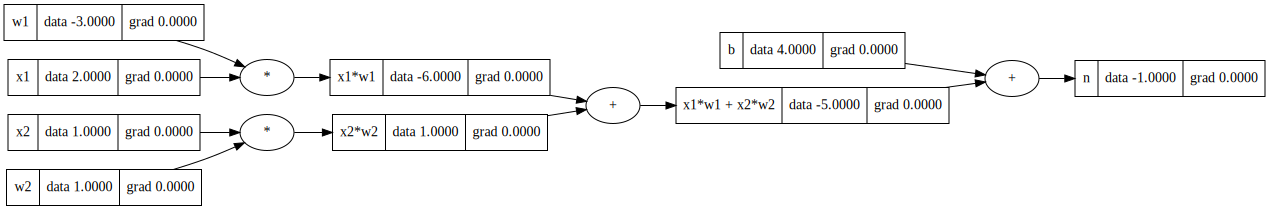

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(1.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(4, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
draw_dot(n)

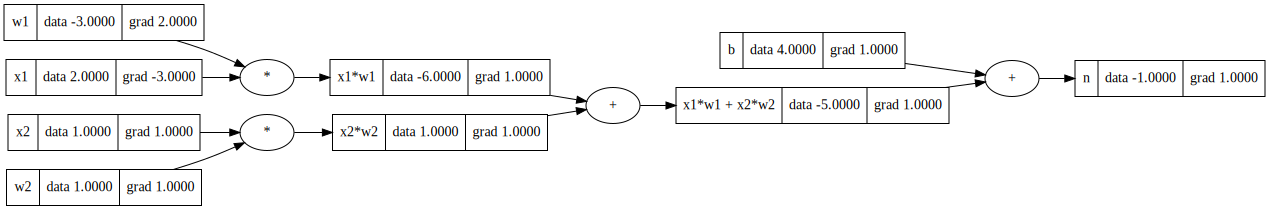

In [ ]:
n.backward()
draw_dot(n)

In the next section, we are going to implement Neuron and MLP layers using `Value`.

### Neuron

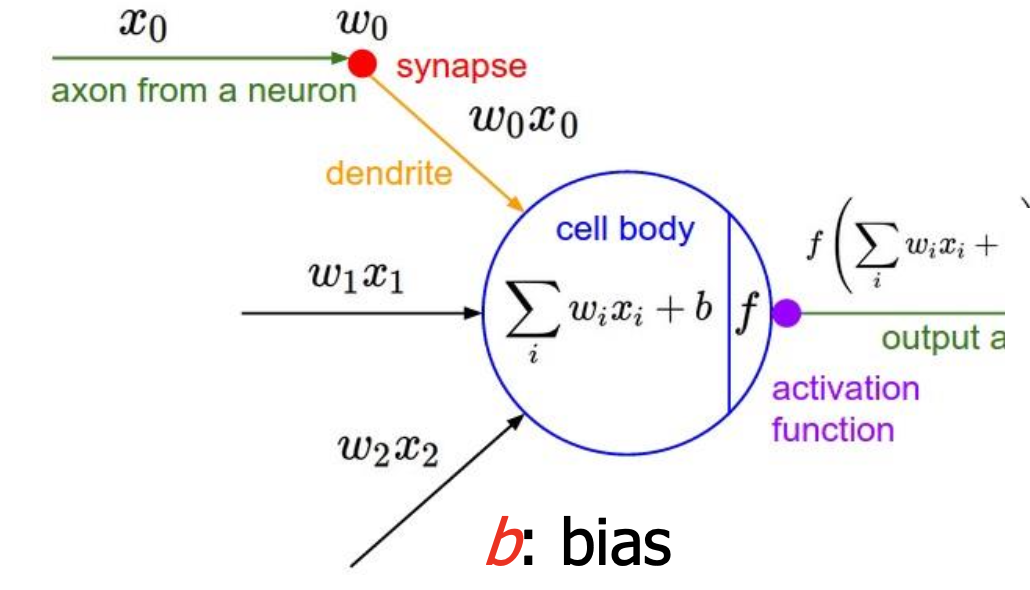





In order to have activation functions in our neural network, we need to add some non-linear function in our `Value` class.

Here, we use the ReLU function to add non-linearity.


In [ ]:
import math

class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _prev=(),  _op='', label=''):
        self.data = data
        self._prev = set(_prev)
        self.grad = 0
        self._op = _op # the op that produced this node, for visualization and debugging
        self.label = label # for visualization and debugging
        self._backward = lambda: None

    # TODO: Paste your previous implemented functions here
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        # Paste your previous written code here
        out = Value(self.data + other.data, (self, other), '+')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __radd__(self, other): # other * self
        return self + other

    def __mul__(self, other):
        # TODO: following __add__() to implement multiplication and its backward function
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other.data * out.grad
            other.grad += self.data * out.grad
        out._backward = _backward
        return out

    def __rmul__(self, other): # other * self
        return self * other

    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        # TODO: following __add__() to implement power and its backward function
        out = Value(self.data ** other, (self,), f'**{other}')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += other * (self.data ** (other - 1)) * out.grad # *out.grad to chain the gradient!
        out._backward = _backward
        return out

    def __neg__(self): # -self
        return self * -1

    def __sub__(self, other): # self - other
        return self + (-other)

    def __rsub__(self, other): # other - self
        return other + (-self)

    def __truediv__(self, other): # self / other
        return self * other**-1

    def __rtruediv__(self, other): # other / self
        return other * self**-1

    def relu(self):
        # TODO: Implement the ReLU function and its _backward function.
        out = Value(0 if self.data < 0 else self.data, (self,), 'ReLU')
        def _backward():
            # TODO: Implement the gradient function with respect to each input
            # NOTE: we are accumulating gradients here because of multivariate chain rule!
            self.grad += (out.data > 0) * out.grad
        out._backward = _backward
        return out

    def backward(self):
      # TODO: Use the provided function 'topo_sort' to perform the backward pass from the self node all the way to the beginning of the graph
        topo = []
        visited = set()
        def build_topo(v):
          if v not in visited:
            visited.add(v)
            for child in v._prev:
                build_topo(child)
            topo.append(v)
        build_topo(self)
        self.grad = 1.0

        for n in reversed(topo):
          n._backward()

    def __repr__(self):
        return f"Value(data={self.data}, grad={self.grad})"

Next, we define the `Neuron` class.

In [ ]:
import random

# Base class for all modules following the PyTorch style
class Module:

    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0

    def parameters(self):
        return []

class Neuron(Module):

    def __init__(self, nin, nonlin=True):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)
        self.nonlin = nonlin

    def __call__(self, x):
        # TODO: Implement the forward pass of a neuron by weighted sum of x and add bias. Apply relu if nonlin=True
        # w*x+b
        wixi = [wi * xi for wi, xi in zip(self.w, x)]
        act = sum(wixi, self.b)
        return act.relu() if self.nonlin else act

    def parameters(self):
        return self.w + [self.b]

    def __repr__(self):
        return f"{'Relu' if self.nonlin else 'Linear'}Neuron({len(self.w)})"

[-0.15744129718467, -0.29894632409618943]


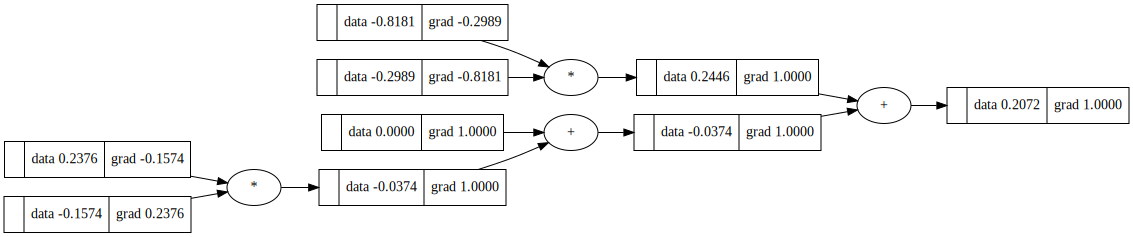

In [ ]:
import numpy as np

# Test a neuron
n = Neuron(2, nonlin=False)
data = np.random.randn(1, 2).tolist()[0]
print(data)
out = n(data)
out.backward()
draw_dot(out)

### Layer and multilayer perceptron (MlP)

A multilayer perceptron (MLP) is composed of several layers and each layer is composed of some neurons.

In [ ]:
# A layer of a simple MLP
class Layer(Module):

    def __init__(self, nin, nout, **kwargs):
        self.neurons = [Neuron(nin, **kwargs) for _ in range(nout)]

    def __call__(self, x):
        # TODO: Implement the forward pass of a layer by calling each neuron and return the output of each neuron as a list
        out = [n(x) for n in self.neurons]
        return out[0] if len(out) == 1 else out

    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]

    def __repr__(self):
        return f"Layer of [{', '.join(str(n) for n in self.neurons)}]"

class MLP(Module):

    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1], nonlin=i!=len(nouts)-1) for i in range(len(nouts))]

    def __call__(self, x):
        # TODO: Implement the forward pass of a MLP by calling each layer
        for layer in self.layers:
            x = layer(x)
        return x

    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]

    def __repr__(self):
        return f"MLP of [{', '.join(str(layer) for layer in self.layers)}]"

Now, we have implemented a MLP and auto differentiation from scratch.
Let's try to implement a two layer MLP for binary classification.

In [ ]:
import numpy as np
np.random.seed(568)
random.seed(568)

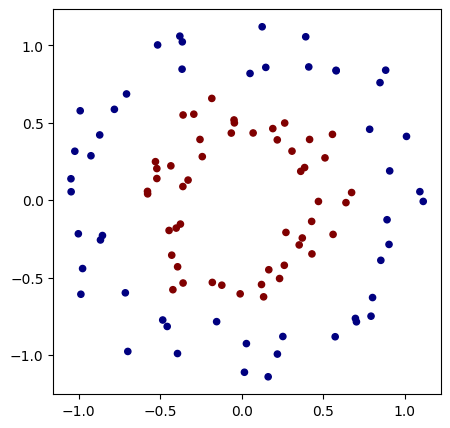

Labels, y, have {1, -1} values


In [ ]:
# make up a dataset
from matplotlib import pyplot as plt
from sklearn.datasets import make_circles
X, y =  make_circles(noise=0.1, factor=0.5)
y = y*2 -1 # convert to -1,1 labels

# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')
plt.show()
print(f'Labels, y, have {set(y)} values')

Let's initialize a MLP with 1 hidden layer of 16 neurons

In [ ]:
# TODO: initialize a MLP with 2 hidden layers that each layer contains 16 neurons.)

nin = 3 # input size
nouts = [16, 16, 1]  # two hidden layers of 16 neurons, one output layer

model = MLP(nin, nouts)

print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3), ReluNeuron(3)], Layer of [ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16), ReluNeuron(16)], Layer of [LinearNeuron(16)]]
number of parameters 353


In the following parts, we use a simple stochastic gradient descent (SGD) to train the MLP.
For future homework problems, you will use more sophisticated optimizers like Adam, AdamW provided by PyTorch.

In [ ]:
# loss function
def train_each_batch(batch_size=None):

    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # hinge loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    total_loss = data_loss

    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)


In [ ]:
for step in range(100):
    total_loss, acc = train_each_batch()
    # TODO: zero the gradients of all model parameters
    for p in model.parameters():
      p.grad = 0.0

    # TODO: call the backward function on the total loss to compute the gradients of each model parameter
    total_loss.backward()
    learning_rate = 1.0 - 0.9*step/100 # A simple way to adjust the learning rate
    for p in model.parameters():
        # TODO: update the model parameters using the gradients
        p.data += -1 * learning_rate * p.grad
    if step % 10 == 0:
        print(f"step {step} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 1.0896630550685422, accuracy 50.0%
step 10 loss 1.3707315434961107, accuracy 50.0%
step 20 loss 0.5658340392625576, accuracy 70.0%
step 30 loss 0.05840461908059363, accuracy 100.0%
step 40 loss 0.029170662610849222, accuracy 100.0%
step 50 loss 0.013444553429098671, accuracy 100.0%
step 60 loss 0.012773280095715652, accuracy 100.0%
step 70 loss 0.007463327217982683, accuracy 100.0%
step 80 loss 0.0041809207171990305, accuracy 100.0%
step 90 loss 8.113498544951581e-05, accuracy 100.0%


We can visualize the prediction result by plotting the decision boundary.

(-2.139163231437874, 2.110836768562126)

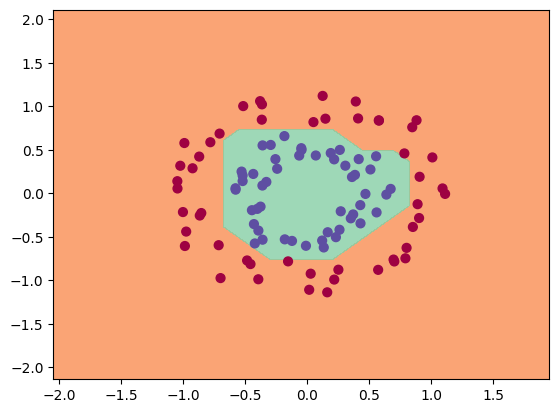

In [ ]:
# Visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

Congradulations! You have trained a binary classifier using MLP built from scratch.

## Problem 3 (40%) Image Classification on CIFAR-10 Using Multilayer Perceptron (MLP)

Image classification using a Multilayer Perceptron (MLP) involves training a neural network to categorize images into predefined classes. MLPs consist of fully connected layers where each neuron in one layer is connected to every neuron in the next layer. In image classification, the image is first flattened into a one-dimensional vector before being fed into the network.

CIFAR-10 is a widely used dataset for image classification tasks, consisting of 60,000 color images, each with a resolution of 32x32 pixels. The dataset is divided into 10 distinct classes, including objects like airplanes, cars, birds, cats, and dogs. It is split into 50,000 training images and 10,000 test images, with each class containing 6,000 images. Due to its moderate size and variety of classes, CIFAR-10 serves as a common benchmark for evaluating machine learning models, especially in image recognition and classification tasks.



(a) CIFAR-10 dataset preparation

CIFAR-10 is included in [torchvision](https://pytorch.org/vision/stable/index.html).

In [59]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse',
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))])

# Randomly split the training set into 45000 training and 5000 validation
generator1 = torch.Generator().manual_seed(42)
cifar10_trainset, cifar10_valset = torch.utils.data.random_split(datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform), [45000, 5000], generator1)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

# train_loader
# cifar_train_loader = DataLoader(cifar10_trainset, batch_size=128, shuffle=True)

cifar_val_loader = DataLoader(cifar10_valset, batch_size=128, shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


Visualize some samples in the CIFAR-10 dataset.

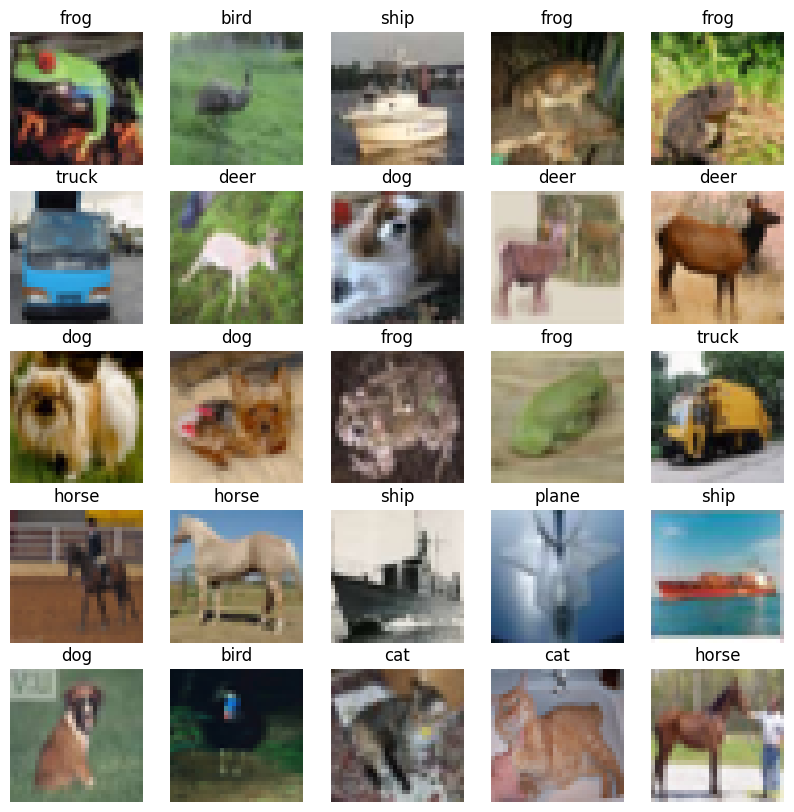

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

fig, axs = plt.subplots(5, 5, figsize = (10, 10))
for i, ax in enumerate(axs.flat):
  ax.imshow(cifar_imshow(cifar10_trainset[i][0]))
  ax.axis('off')
  ax.set_title('{}'.format(classes[cifar10_trainset[i][1]]))

In [61]:
# We define the dataloader. It basically gives you # of batch_size data samples every time you access it.
cifar_train_loader = DataLoader(cifar10_trainset, batch_size=128, shuffle=True)

The following image shows an example of MLP.

Assume the shape (# of color channels, height, width) of a image tensor is (3x16x16). To feed the image into MLP layers, we first flatten the image tensor(3x16x16) into 1-D vector (768).
Afterwards, each pixel of a color channel can be treated as an input neuron.

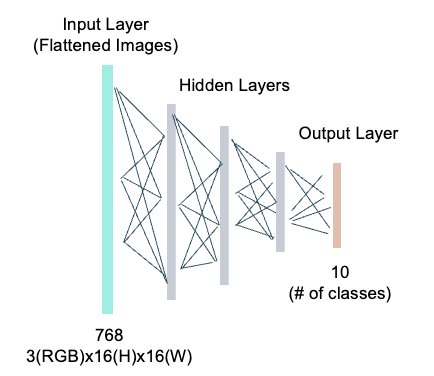

Given the following network parameters, implement the following MLP layers using PyTorch.
```
MLP(
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (mlp_layers): Sequential(
    (0): MLPLayer(
      (linear): Linear(in_features=768, out_features=196, bias=True)
      (relu): ReLU()
    )
    (1): MLPLayer(
      (linear): Linear(in_features=196, out_features=100, bias=True)
      (relu): ReLU()
    )
    (2): MLPLayer(
      (linear): Linear(in_features=100, out_features=50, bias=True)
      (relu): ReLU()
    )
  )
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
)
```

In [62]:
# MLP Configs
mlp1_config = {'neuron_counts': (768, 196, 100, 50), 'output_class': 10}

In [63]:
import torch.nn as nn
import torch.nn.functional as F

class MLPLayer(nn.Module):
  def __init__(self, in_features, out_features):
    super(MLPLayer, self).__init__()
    # TODO: implement one MLP layer
    self.linear = nn.Linear(in_features, out_features)
    # ReLU activation function
    self.activation = nn.ReLU()
  def forward(self, x):
    # return pass
    # apply linear transformation followed by ReLU activation
    return self.activation(self.linear(x))

class MLP(nn.Module):
  def __init__(self, neuron_counts=(), output_class=10):
    super().__init__()
    # We define a pooling layer here to resize the input image from 3x32x32 to 3x16x16
    self.pool = nn.AvgPool2d(2, stride=2) # We use average pooling the downsample the image size
    # TODO: define your MLP given the parapeters

    layer = []
    for i in range(len(neuron_counts) - 1):
      layer.append(MLPLayer(neuron_counts[i], neuron_counts[i+1]))
    self.mlp_layers = nn.Sequential(*layer)
    self.output_layer = nn.Linear(neuron_counts[-1], output_class)

  def forward(self, x):
    x = self.pool(x)
    x = x.view(x.size(0), -1) # Flatten RGB image layout into 1-D vector
    return self.output_layer(self.mlp_layers(x))

We can test if the model class can work by creating an instance of the model.

In [64]:
mlp1 = MLP(**mlp1_config)

In [65]:
mlp1

MLP(
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (mlp_layers): Sequential(
    (0): MLPLayer(
      (linear): Linear(in_features=768, out_features=196, bias=True)
      (activation): ReLU()
    )
    (1): MLPLayer(
      (linear): Linear(in_features=196, out_features=100, bias=True)
      (activation): ReLU()
    )
    (2): MLPLayer(
      (linear): Linear(in_features=100, out_features=50, bias=True)
      (activation): ReLU()
    )
  )
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
)

Let's do classification on CIFAR-10 dataset.
**Note**: remember to keep the logs of training.

In [66]:
# TODO: write your training code to train the pytorch model
import torch.optim as optim
# from tqdm import tqdm
def train(train_loader, net, criterion, optimizer):
  net.train() # training mode
  running_loss = 0.0
  total = 0
  correct = 0
  for i,(inputs, labels) in enumerate(train_loader):

    # move to the same device
    inputs, labels = inputs.to(device), labels.to(device)

    # zero the gradient
    optimizer.zero_grad()

    # forward
    outputs = net(inputs)
    loss = criterion(outputs, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # accumulate loss
    running_loss += loss.item()

    # compute accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  train_loss = running_loss / len(train_loader)
  accuracy = 100 * correct / total
  return train_loss, accuracy



# TODO: write your testing code for the image classification
def test(test_loader, net, criterion):
  net.eval() # evaluation mode
  running_loss = 0.0
  total = 0
  correct = 0

  with torch.no_grad():

    # move to the same device
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # forward
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()

      # accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  test_loss = running_loss / len(test_loader)
  accuracy = 100 * correct / total
  return test_loss, accuracy




In [67]:

# cpu or gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

n_epoch = 10
mlp1 = MLP(**mlp1_config).to(device)  # operate MLP on GPU and initialize the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, mlp1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, mlp1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")


Epoch 1/10
training loss: 1.757, training accuracy: 37.06%
val loss: 1.577, val accuracy: 43.86%

Epoch 2/10
training loss: 1.505, training accuracy: 46.60%
val loss: 1.477, val accuracy: 48.36%

Epoch 3/10
training loss: 1.399, training accuracy: 50.56%
val loss: 1.407, val accuracy: 51.00%

Epoch 4/10
training loss: 1.323, training accuracy: 53.19%
val loss: 1.374, val accuracy: 51.38%

Epoch 5/10
training loss: 1.262, training accuracy: 55.44%
val loss: 1.350, val accuracy: 51.84%

Epoch 6/10
training loss: 1.212, training accuracy: 57.02%
val loss: 1.348, val accuracy: 52.26%

Epoch 7/10
training loss: 1.165, training accuracy: 58.84%
val loss: 1.335, val accuracy: 53.60%

Epoch 8/10
training loss: 1.126, training accuracy: 60.12%
val loss: 1.314, val accuracy: 54.10%

Epoch 9/10
training loss: 1.084, training accuracy: 61.68%
val loss: 1.313, val accuracy: 54.30%

Epoch 10/10
training loss: 1.053, training accuracy: 62.92%
val loss: 1.325, val accuracy: 53.66%



Evaluate the classfication performance on the testing set.

In [68]:
# todo: use your test() to test your mlp1

test_loss, test_accuracy = test(cifar_test_loader, mlp1, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 1.328, Test Accuracy: 53.77%


#### Data Augmentation

In order to mitigate overfitting and simulate real-world data variability, we can transform our data by data augmentation. Here, we will implement some common tricks for data augmentation.

In [69]:
from torch.utils.data import ConcatDataset
import copy
# import torchvision.transforms as transforms

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))])

# TODO: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = transforms.Compose([
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Rotating: randomly rotate the images by range (-30 degrees, 30 degrees).
transform3 = transforms.Compose([
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Flipping: horizontally flip the images.
transform4 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = transforms.Compose([
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)), # add gaussian blur
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (1.0, 1.0, 1.0))
])

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  dataset = copy.deepcopy(cifar10_trainset)
  dataset.transform = t
  augmented_dataset.append(dataset)

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar_train_loader = DataLoader(cifar_train_dataset, batch_size=128, shuffle=True)

Use the same MLP architecture to train on the augmented training dataset.

**Note**: remember to keep the logs of training.

In [70]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


Define a loss function and optimizer.

In [71]:
mlp1 = MLP(**mlp1_config).to(device)  # operate MLP on GPU and initialize the model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. Evaluate your model at the end of your epoch.

In [72]:
# train and test function
import torch.optim as optim
# from tqdm import tqdm
def train(train_loader, net, criterion, optimizer):
  net.train() # training mode
  running_loss = 0.0
  total = 0
  correct = 0
  for i,(inputs, labels) in enumerate(train_loader):

    # move to the same device
    inputs, labels = inputs.to(device), labels.to(device)

    # zero the gradient
    optimizer.zero_grad()

    # forward
    outputs = net(inputs)
    loss = criterion(outputs, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # accumulate loss
    running_loss += loss.item()

    # compute accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  train_loss = running_loss / len(train_loader)
  accuracy = 100 * correct / total
  return train_loss, accuracy



def test(test_loader, net, criterion):
  net.eval() # evaluation mode
  running_loss = 0.0
  total = 0
  correct = 0

  with torch.no_grad():

    # move to the same device
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # forward
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()

      # accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  test_loss = running_loss / len(test_loader)
  accuracy = 100 * correct / total
  return test_loss, accuracy

In [73]:
n_epoch = 10

In [ ]:
print("Training with data augmentation:\n")
for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, mlp1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, mlp1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

Training with data augmentation:

Epoch 1/10
training loss: 0.776, training accuracy: 72.22%
val loss: 1.649, val accuracy: 51.04%

Epoch 2/10
training loss: 0.776, training accuracy: 72.22%
val loss: 1.649, val accuracy: 51.04%

Epoch 3/10


Evaluate the classfication performance on the testing set.

In [74]:
# todo: use your test() to test your mlp1

test_loss, test_accuracy = test(cifar_test_loader, mlp1, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 2.305, Test Accuracy: 10.00%


Testing log:  
Test Loss: 2.892, Test Accuracy: 52.04%

Change the activation function of each MLP layer. Train the model and report your testing accuracy on the test set.your testing accuracy on the test set. You only need to choose one more activation function to get full points but feel free to try more!

In [75]:
import torch.nn as nn
import torch.nn.functional as F

class MLPLayer(nn.Module):
  def __init__(self, in_features, out_features):
    super(MLPLayer, self).__init__()
    # TODO: implement one MLP layer
    self.linear = nn.Linear(in_features, out_features)
    # change activation function from relu to sigmoid
    self.activation = nn.Sigmoid()
  def forward(self, x):
    # return pass
    # apply linear transformation followed by ReLU activation
    return self.activation(self.linear(x))

class MLP(nn.Module):
  def __init__(self, neuron_counts=(), output_class=10):
    super().__init__()
    # We define a pooling layer here to resize the input image from 3x32x32 to 3x16x16
    self.pool = nn.AvgPool2d(2, stride=2) # We use average pooling the downsample the image size
    # TODO: define your MLP given the parapeters

    layer = []
    for i in range(len(neuron_counts) - 1):
      layer.append(MLPLayer(neuron_counts[i], neuron_counts[i+1]))
    self.mlp_layers = nn.Sequential(*layer)
    self.output_layer = nn.Linear(neuron_counts[-1], output_class)

  def forward(self, x):
    x = self.pool(x)
    x = x.view(x.size(0), -1) # Flatten RGB image layout into 1-D vector
    return self.output_layer(self.mlp_layers(x))

In [76]:
mlp1 = MLP(**mlp1_config).to(device)
mlp1

MLP(
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (mlp_layers): Sequential(
    (0): MLPLayer(
      (linear): Linear(in_features=768, out_features=196, bias=True)
      (activation): Sigmoid()
    )
    (1): MLPLayer(
      (linear): Linear(in_features=196, out_features=100, bias=True)
      (activation): Sigmoid()
    )
    (2): MLPLayer(
      (linear): Linear(in_features=100, out_features=50, bias=True)
      (activation): Sigmoid()
    )
  )
  (output_layer): Linear(in_features=50, out_features=10, bias=True)
)

In [77]:
# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
n_epoch = 10

In [78]:
print("change the activation function and train again:\n")
for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, mlp1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, mlp1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

change the activation function and train again:

Epoch 1/10
training loss: 1.793, training accuracy: 34.44%
val loss: 1.631, val accuracy: 41.92%

Epoch 2/10
training loss: 1.502, training accuracy: 45.89%
val loss: 1.501, val accuracy: 46.88%

Epoch 3/10
training loss: 1.355, training accuracy: 51.40%
val loss: 1.450, val accuracy: 48.94%

Epoch 4/10
training loss: 1.242, training accuracy: 55.47%
val loss: 1.465, val accuracy: 49.68%

Epoch 5/10
training loss: 1.151, training accuracy: 58.75%
val loss: 1.439, val accuracy: 50.50%

Epoch 6/10
training loss: 1.071, training accuracy: 61.63%
val loss: 1.465, val accuracy: 51.50%

Epoch 7/10
training loss: 1.002, training accuracy: 64.17%
val loss: 1.518, val accuracy: 50.24%

Epoch 8/10
training loss: 0.939, training accuracy: 66.47%
val loss: 1.578, val accuracy: 49.88%

Epoch 9/10
training loss: 0.883, training accuracy: 68.41%
val loss: 1.615, val accuracy: 50.62%

Epoch 10/10
training loss: 0.829, training accuracy: 70.28%
val loss:

In [79]:
# test the accuracy
test_loss, test_accuracy = test(cifar_test_loader, mlp1, criterion)

print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

Test Loss: 1.621, Test Accuracy: 50.76%


Try different number of hidden layers and/or different number of neurons of hidden layers. Train models and report your testing accuracy on the test set. At least try two more combinations. For example,

experiment 1: double number of hidden layers.  

experiment 2: doubles number of neourns for each layer.

In [80]:
import torch.nn as nn
import torch.nn.functional as F

class MLPLayer(nn.Module):
  def __init__(self, in_features, out_features):
    super(MLPLayer, self).__init__()
    # TODO: implement one MLP layer
    self.linear = nn.Linear(in_features, out_features)
    # self.activation = nn.ReLU()
    self.activation = nn.Sigmoid()
  def forward(self, x):
    # return pass
    # apply linear transformation followed by ReLU activation
    return self.activation(self.linear(x))

class MLP(nn.Module):
  def __init__(self, neuron_counts=(), output_class=10):
    super().__init__()
    # We define a pooling layer here to resize the input image from 3x32x32 to 3x16x16
    self.pool = nn.AvgPool2d(2, stride=2) # We use average pooling the downsample the image size
    # TODO: define your MLP given the parapeters

    layer = []
    for i in range(len(neuron_counts) - 1):
      layer.append(MLPLayer(neuron_counts[i], neuron_counts[i+1]))
    self.mlp_layers = nn.Sequential(*layer)
    self.output_layer = nn.Linear(neuron_counts[-1], output_class)

  def forward(self, x):
    x = self.pool(x)
    x = x.view(x.size(0), -1) # Flatten RGB image layout into 1-D vector
    return self.output_layer(self.mlp_layers(x))

In [81]:
# new MLP Configs
mlp1_config = {'neuron_counts': (768, 196, 100, 50), 'output_class': 10} # original config
mlp1_config_exp_1 = {'neuron_counts': (768, 196, 100, 50, 25, 12), 'output_class': 10} #  double number of hidden layers.
mlp1_config_exp_2 = {'neuron_counts': (768, 392, 200, 100), 'output_class': 10} # doubles number of neourns for each layer.

In [82]:
# exp 1
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
mlp_exp1 = MLP(**mlp1_config_exp_1).to(device)
mlp_exp1

cpu


MLP(
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (mlp_layers): Sequential(
    (0): MLPLayer(
      (linear): Linear(in_features=768, out_features=196, bias=True)
      (activation): Sigmoid()
    )
    (1): MLPLayer(
      (linear): Linear(in_features=196, out_features=100, bias=True)
      (activation): Sigmoid()
    )
    (2): MLPLayer(
      (linear): Linear(in_features=100, out_features=50, bias=True)
      (activation): Sigmoid()
    )
    (3): MLPLayer(
      (linear): Linear(in_features=50, out_features=25, bias=True)
      (activation): Sigmoid()
    )
    (4): MLPLayer(
      (linear): Linear(in_features=25, out_features=12, bias=True)
      (activation): Sigmoid()
    )
  )
  (output_layer): Linear(in_features=12, out_features=10, bias=True)
)

In [83]:
# train and test function
import torch.optim as optim
# from tqdm import tqdm
def train(train_loader, net, criterion, optimizer):
  net.train() # training mode
  running_loss = 0.0
  total = 0
  correct = 0
  for i,(inputs, labels) in enumerate(train_loader):

    # move to the same device
    inputs, labels = inputs.to(device), labels.to(device)

    # zero the gradient
    optimizer.zero_grad()

    # forward
    outputs = net(inputs)
    loss = criterion(outputs, labels)

    # backward
    loss.backward()

    # optimize
    optimizer.step()

    # accumulate loss
    running_loss += loss.item()

    # compute accuracy
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  train_loss = running_loss / len(train_loader)
  accuracy = 100 * correct / total
  return train_loss, accuracy



def test(test_loader, net, criterion):
  net.eval() # evaluation mode
  running_loss = 0.0
  total = 0
  correct = 0

  with torch.no_grad():

    # move to the same device
    for inputs, labels in test_loader:
      inputs, labels = inputs.to(device), labels.to(device)

      # forward
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      running_loss += loss.item()

      # accuracy
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()

  # return average loss and accuracy for the epoch
  test_loss = running_loss / len(test_loader)
  accuracy = 100 * correct / total
  return test_loss, accuracy

In [84]:
# exp 1
# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_exp1.parameters(), lr=0.01, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
n_epoch = 10

# train the network
print("mlp exp 1: double number of hidden layers:\n")
for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, mlp_exp1, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, mlp_exp1, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

# test the accuracy
test_loss, test_accuracy = test(cifar_test_loader, mlp_exp1, criterion)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

mlp exp 1: double number of hidden layers:

Epoch 1/10
training loss: 1.806, training accuracy: 32.18%
val loss: 1.677, val accuracy: 39.62%

Epoch 2/10
training loss: 1.499, training accuracy: 45.96%
val loss: 1.561, val accuracy: 45.16%

Epoch 3/10
training loss: 1.346, training accuracy: 51.81%
val loss: 1.585, val accuracy: 44.88%

Epoch 4/10
training loss: 1.238, training accuracy: 55.79%
val loss: 1.578, val accuracy: 45.78%

Epoch 5/10
training loss: 1.147, training accuracy: 59.34%
val loss: 1.582, val accuracy: 45.96%

Epoch 6/10
training loss: 1.073, training accuracy: 61.97%
val loss: 1.642, val accuracy: 45.66%

Epoch 7/10
training loss: 1.011, training accuracy: 64.29%
val loss: 1.691, val accuracy: 46.44%

Epoch 8/10
training loss: 0.957, training accuracy: 66.45%
val loss: 1.716, val accuracy: 45.16%

Epoch 9/10
training loss: 0.907, training accuracy: 68.25%
val loss: 1.730, val accuracy: 46.22%

Epoch 10/10
training loss: 0.875, training accuracy: 69.42%
val loss: 1.83

In [85]:
# exp 2
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
mlp_exp2 = MLP(**mlp1_config_exp_2).to(device)
mlp_exp2

cpu


MLP(
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (mlp_layers): Sequential(
    (0): MLPLayer(
      (linear): Linear(in_features=768, out_features=392, bias=True)
      (activation): Sigmoid()
    )
    (1): MLPLayer(
      (linear): Linear(in_features=392, out_features=200, bias=True)
      (activation): Sigmoid()
    )
    (2): MLPLayer(
      (linear): Linear(in_features=200, out_features=100, bias=True)
      (activation): Sigmoid()
    )
  )
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)

In [86]:
# loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp_exp2.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)
n_epoch = 10

# train the network
print("mlp exp 2: doubles number of neourns for each layer:\n")
for epoch in range(n_epoch):
  # todo: use your train() to train your mlp1 and test() to evaluate on your validation set
  print(f"Epoch {epoch+1}/{n_epoch}")

  # train the model
  training_loss, training_accuracy = train(cifar_train_loader, mlp_exp2, criterion, optimizer)
  print(f"training loss: {training_loss:.3f}, training accuracy: {training_accuracy:.2f}%")

  # val
  val_loss, val_accuracy = test(cifar_val_loader, mlp_exp2, criterion)
  print(f"val loss: {val_loss:.3f}, val accuracy: {val_accuracy:.2f}%\n")

# test the accuracy
test_loss, test_accuracy = test(cifar_test_loader, mlp_exp2, criterion)
print(f"Test Loss: {test_loss:.3f}, Test Accuracy: {test_accuracy:.2f}%")

mlp exp 2: doubles number of neourns for each layer:

Epoch 1/10
training loss: 1.717, training accuracy: 37.50%
val loss: 1.560, val accuracy: 43.94%

Epoch 2/10
training loss: 1.413, training accuracy: 49.42%
val loss: 1.427, val accuracy: 49.64%

Epoch 3/10
training loss: 1.238, training accuracy: 55.71%
val loss: 1.406, val accuracy: 51.14%

Epoch 4/10
training loss: 1.089, training accuracy: 61.15%
val loss: 1.408, val accuracy: 51.96%

Epoch 5/10
training loss: 0.957, training accuracy: 65.81%
val loss: 1.439, val accuracy: 52.52%

Epoch 6/10
training loss: 0.833, training accuracy: 70.19%
val loss: 1.554, val accuracy: 51.68%

Epoch 7/10
training loss: 0.721, training accuracy: 74.31%
val loss: 1.693, val accuracy: 51.02%

Epoch 8/10
training loss: 0.621, training accuracy: 77.87%
val loss: 1.831, val accuracy: 50.66%

Epoch 9/10
training loss: 0.530, training accuracy: 81.26%
val loss: 2.064, val accuracy: 50.48%

Epoch 10/10
training loss: 0.447, training accuracy: 84.39%
val 

What is your finding after two or more experiments? Can you summarize it?

Both models tend to overfit the training data, but the wider model from experiment 2 has the better training accuracy and testing accuracy compared to the deep model from experiment 1. From those two experiments, we can find out that simply increasing model complexity is insufficient to improve models' performance. More techniques or model architecture changes must be utilized to get better performance in image classification tasks.

Why the test accuracy using MLP architectures for image classification only gets around 50% of the accuracy but lots of methods can easily get over 80% of the accuracy. Is there any way improve it? Please write your answer here. (It's not a coding problem, but you are encouraged to try some of your idea here!)

There are several possible reasons causing MLP architectures to have relatively low accuracy. The first one is that MLP architectures have a large numbers of parameters, making it difficult to train the model effectively on small datasets such as CIFAR 10 and MNIST. The second reason is that MLPs can easily overfit because of large parameter counts. They tend to memorize the data rather than learning meaningful features. As for improvements, there are some ways to enhance the model's performance such as using CNN-based architectures, applying some regularization techniques and batch normalization. Also, we can consider usnig vision transformers (ViT) which show great performance in image classification tasks.